In [1]:
from sklearn.cluster import KMeans
!wget https://github.com/leekyuyoung20230313/pythone/raw/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy -O data.npy

--2023-05-22 02:06:59--  https://github.com/leekyuyoung20230313/pythone/raw/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy [following]
--2023-05-22 02:06:59--  https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/imagedata.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3000128 (2.9M) [application/octet-stream]
Saving to: ‘data.npy’

data.npy            100%[===================>]   2.86M 

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [4]:
data = np.load('data.npy')
data_2dim = data.reshape(data.shape[0],data.shape[1]*data.shape[2])
data_2dim.shape


(300, 10000)

In [5]:
km = KMeans(n_clusters=3,random_state=100)
km.fit(data_2dim)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=100)

In [6]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [8]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [25]:
# Kmeans 일 분류한 라벨이 0인 이미지들
def showKmeansClustImg(label = 0):
  data_len = len(data[km.labels_ == label])
  rowcol = int(np.round(np.sqrt(data_len)))
  print(rowcol)
  for idx, img in enumerate(data[km.labels_ == label]):
    plt.subplot(rowcol,rowcol,idx+1)
    plt.imshow(img,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
  plt.show()  

11


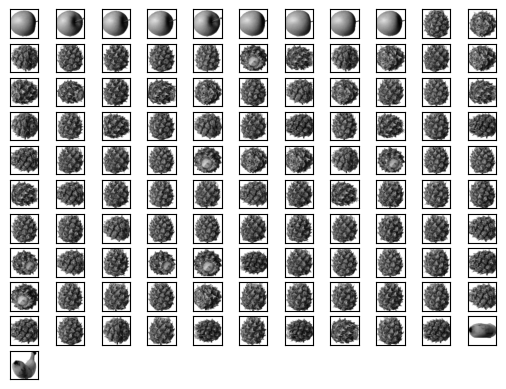

In [28]:
showKmeansClustImg(0)  

In [32]:
# 클러스터의 중심
center_imgs = km.cluster_centers_.reshape(-1,100,100)
center_imgs.shape

(3, 100, 100)

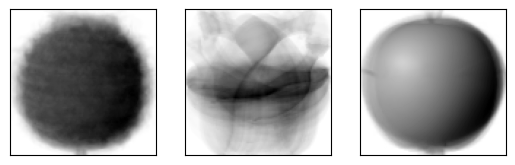

In [34]:
for idx , img in enumerate(center_imgs):
  plt.subplot(1,3,idx+1)
  plt.imshow(img,cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
plt.show()

In [40]:
# 엘 보우  inertia(이너셔) 군집을 결정하는 중심과 각 데이터의 거리의 제곱합
# 얼마나 가깝게 모여있는지 나타내는 지표
# 작을수록 응집도가 높음
# 이 값을 작은 방향으로 학습해서 최적의 군집
result = []
for k in range(2,6):
  km = KMeans(n_clusters=k, random_state=100,n_init=10)
  km.fit(data_2dim)
  result.append(km.inertia_)

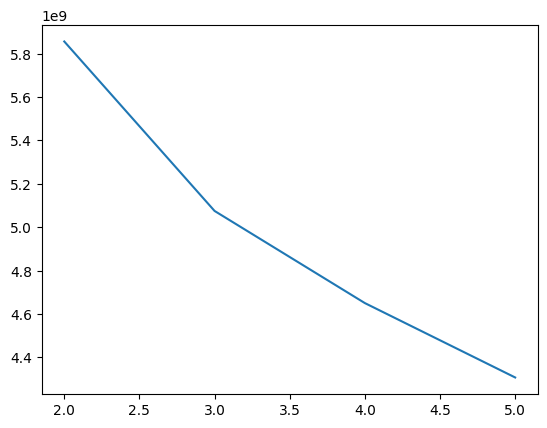

In [43]:
plt.plot(range(2,6),result)
plt.show()